In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Profit1 Prediction.csv")

In [3]:
dataset

,Dell,Hp,Barclays,Country,Profit
0,2345.52,9990.88,27192.94,USA,7.312252e+06
1,4256.86,11902.22,29104.28,India,7.949365e+06
2,6168.20,13813.56,31015.62,Spain,8.586478e+06
3,8079.54,15724.90,32926.96,USA,9.223592e+06
4,9990.88,17636.24,34838.30,India,9.860705e+06
5,11902.22,19547.58,36749.64,Spain,1.049782e+07
6,13813.56,21458.92,38660.98,USA,1.113493e+07
7,15724.90,23370.26,40572.32,India,1.177204e+07
8,17636.24,25281.60,42483.66,Spain,1.240916e+07
9,19547.58,27192.94,44395.00,USA,1.304627e+07


In [4]:
dataset.columns

Index(['Dell', 'Hp', 'Barclays', 'Country', 'Profit'], dtype='object')

In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [6]:
dataset

,Dell,Hp,Barclays,Profit,Country_Spain,Country_USA
0,2345.52,9990.88,27192.94,7.312252e+06,False,True
1,4256.86,11902.22,29104.28,7.949365e+06,False,False
2,6168.20,13813.56,31015.62,8.586478e+06,True,False
3,8079.54,15724.90,32926.96,9.223592e+06,False,True
4,9990.88,17636.24,34838.30,9.860705e+06,False,False
5,11902.22,19547.58,36749.64,1.049782e+07,True,False
6,13813.56,21458.92,38660.98,1.113493e+07,False,True
7,15724.90,23370.26,40572.32,1.177204e+07,False,False
8,17636.24,25281.60,42483.66,1.240916e+07,True,False
9,19547.58,27192.94,44395.00,1.304627e+07,False,True


In [7]:
Indep=dataset[['Dell', 'Hp', 'Barclays', 'Country_Spain', 'Country_USA']]

In [8]:
Depent=dataset[["Profit"]]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Indep, Depent, test_size=0.30, random_state=0)

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='best', max_features='log2')
regressor=regressor.fit(x_train,y_train)

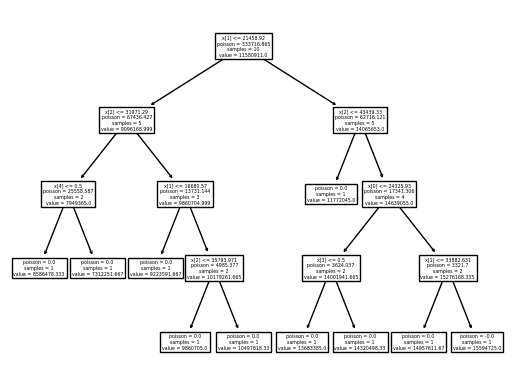

In [60]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [61]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.943946188423817

In [17]:
import pickle
filename="finalized_model_linear.sav"
pickle.dump(regressor,open(filename, 'wb'))

In [18]:
loaded_model=pickle.load(open("finalized_model_linear.sav",'rb'))
result=loaded_model.predict([[23,45,45,56,89]])
result 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7312251.667])